In [1]:
import sys
sys.path.append('../modules')
from wrangling import wrangling_serie_sistema as wr
from grafo_estacionalidad import Grafo_Estacionalidad as graf

In [2]:
import pandas as pd
#x = df_icomercial = pd.read_csv('../data/marzo2022/Serie-original.xlsx', header=None, delimiter=";", names=column_names, skiprows = 1, index_col=None)
x = df_icomercial = pd.read_csv('../data/marzo2022/Serie original.csv',  delimiter=";", index_col= 0)


In [3]:
wr()

,Mes_num,Año,Mes,v_x,v_x_var,v_x_media,v_m,v_m_var,v_m_media,ITI,ITI_var,ITI_media
0,1,2011,Ene,5.185118e+09,0.176257,4.108523e+09,4.889191e+09,0.523502,3.693176e+09,106.052658,-0.227926,126.253972
1,1,2012,Ene,5.399277e+09,0.041303,4.108523e+09,5.363737e+09,0.097060,3.693176e+09,100.662605,-0.050824,126.253972
2,1,2013,Ene,5.383028e+09,-0.003010,4.108523e+09,5.358211e+09,-0.001030,3.693176e+09,100.463146,-0.001981,126.253972
3,1,2014,Ene,4.275296e+09,-0.205782,4.108523e+09,5.648614e+09,0.054198,3.693176e+09,75.687525,-0.246614,126.253972
4,1,2015,Ene,3.795979e+09,-0.112113,4.108523e+09,4.362692e+09,-0.227653,3.693176e+09,87.010025,0.149595,126.253972
...,...,...,...,...,...,...,...,...,...,...,...,...
130,12,2017,Dic,4.578421e+09,-0.015275,4.560054e+09,5.365931e+09,0.167832,3.932802e+09,85.323895,-0.156793,127.718007
131,12,2018,Dic,5.336414e+09,0.165558,4.560054e+09,3.916873e+09,-0.270048,3.932802e+09,136.241693,0.596759,127.718007
132,12,2019,Dic,5.374345e+09,0.007108,4.560054e+09,3.133065e+09,-0.200111,3.932802e+09,171.536374,0.259059,127.718007
133,12,2020,Dic,3.544068e+09,-0.340558,4.560054e+09,3.907941e+09,0.247322,3.932802e+09,90.688880,-0.471314,127.718007


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1440x1440 with 1 Axes>,
 <AxesSubplot:title={'center':'Índice de términos de intercambio. Enero 2011 - Marzo 2022'}>)

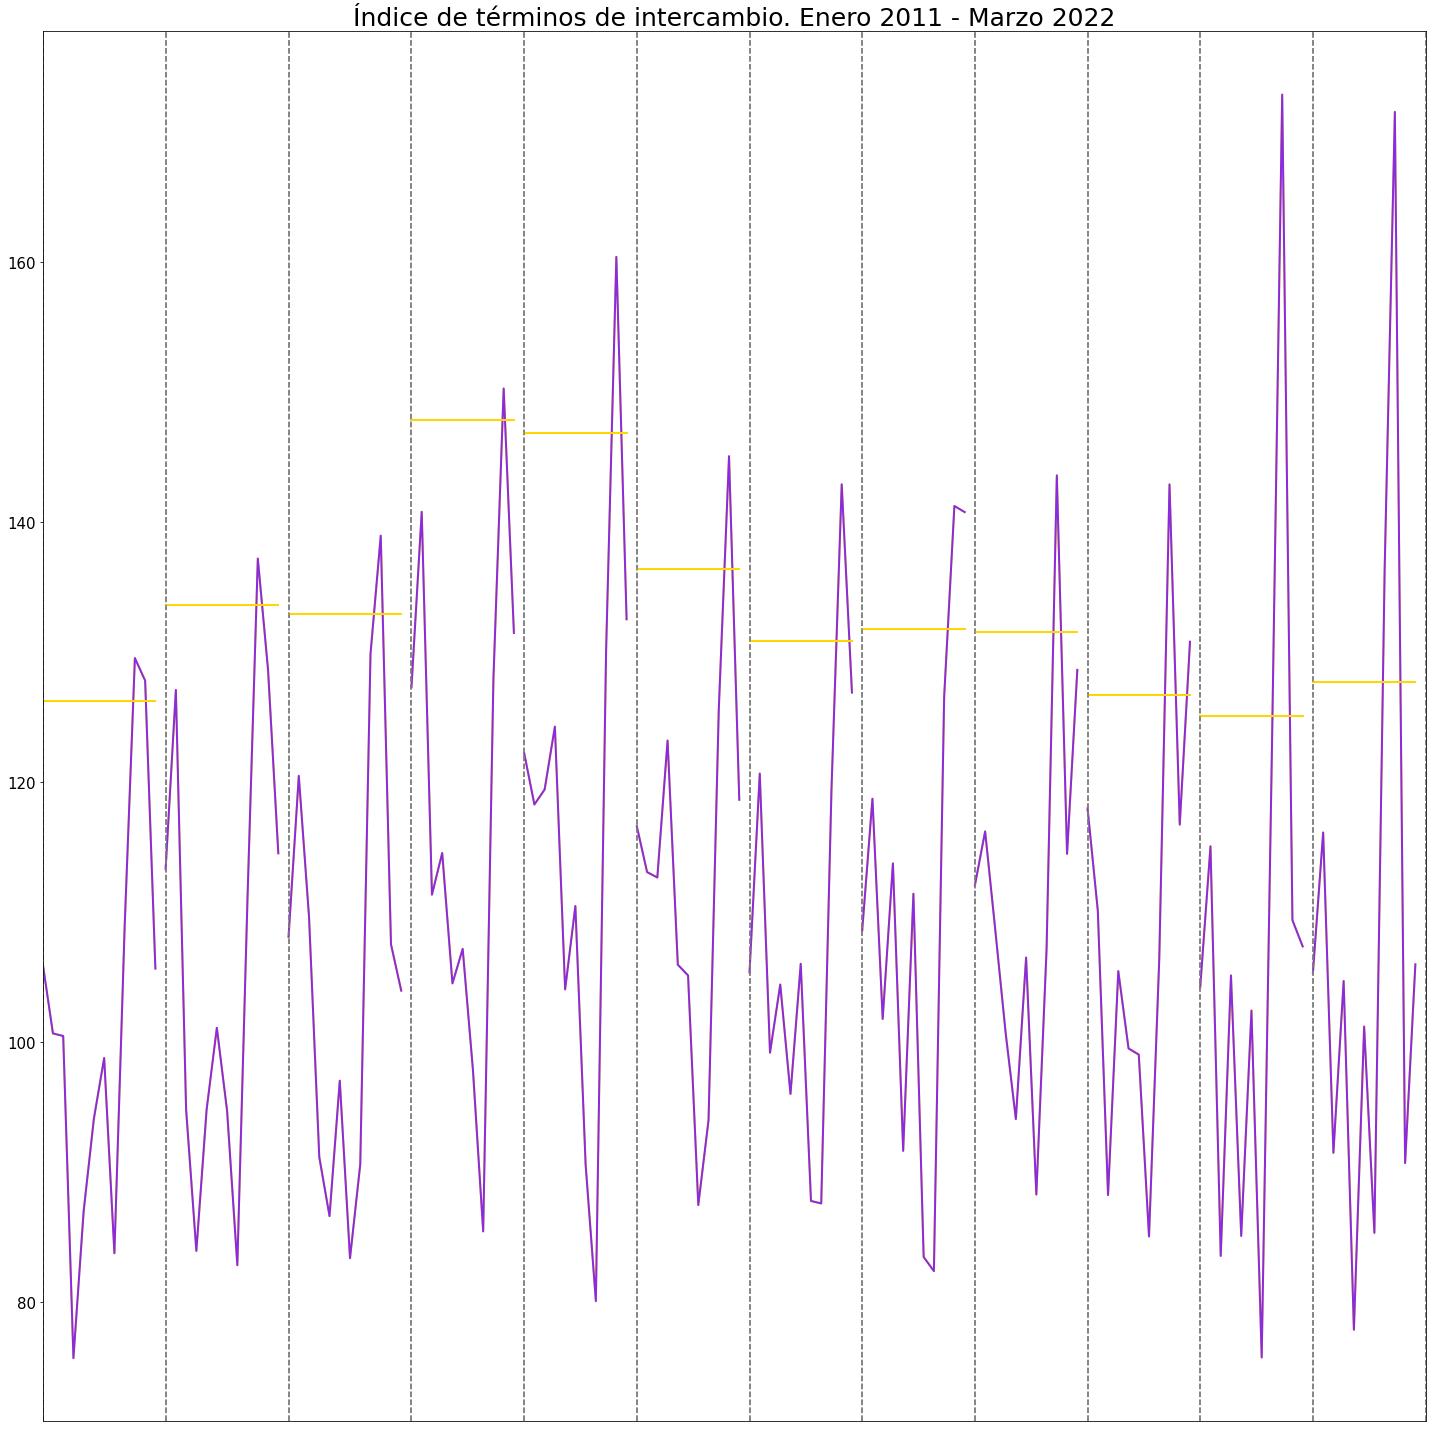

In [4]:
iti = graf(wr(), 'ITI', 'ITI')


iti.set_title('Índice de términos de intercambio. Enero 2011 - Marzo 2022')
iti.hacer_grafo()

In [19]:
datos = iti.get_columns_data()[0]
iti2021 = datos[10]
iti2022 = datos[11]
tablaGabi = iti.get_dfs_tablas()[0].join(iti2021).join(iti2022)
del tablaGabi['Ultimo Año']
tablaGabi.rename(columns = {10:2021, 11:2022}, inplace= True)
tablaGabi = tablaGabi.transpose()

In [20]:
tablaGabi.to_excel('../output/tablas/tablaITI-marzo2022.xlsx')